## Importing libraries

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data

In [254]:
# loading data
df=pd.read_csv("matches.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Data Wrangling

In [196]:
# replacing the team names by their short forms for better readibility
short_forms = {
    "Mumbai Indians": "MI",
    "Chennai Super Kings": "CSK",
    "Kolkata Knight Riders": "KKR",
    "Royal Challengers Bangalore": "RCB",
    "Kings XI Punjab": "KXIP",
    "Rajasthan Royals": "RR",
    "Delhi Daredevils": "DD",
    "Sunrisers Hyderabad": "SRH",
    "Deccan Chargers": "DC",
    "Gujarat Lions": "GL",
    "Pune Warriors": "PW",
    "Rising Pune Supergiant": "RPS",
    "Delhi Capitals": "DCap",
    "Kochi Tuskers Kerala": "KTK",
    "Rising Pune Supergiants": "RPSG"
}

for name, short_form in short_forms.items():
    df.replace(name, short_form, inplace=True)
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               743 non-null    int64 
 1   season           743 non-null    int64 
 2   city             743 non-null    object
 3   date             743 non-null    object
 4   team1            743 non-null    object
 5   team2            743 non-null    object
 6   toss_winner      743 non-null    object
 7   toss_decision    743 non-null    object
 8   result           743 non-null    object
 9   dl_applied       743 non-null    int64 
 10  winner           743 non-null    object
 11  win_by_runs      743 non-null    int64 
 12  win_by_wickets   743 non-null    int64 
 13  player_of_match  743 non-null    object
 14  venue            743 non-null    object
 15  umpire1          743 non-null    object
 16  umpire2          743 non-null    object
dtypes: int64(5), object(12)
memory usag

## Dealing with null values

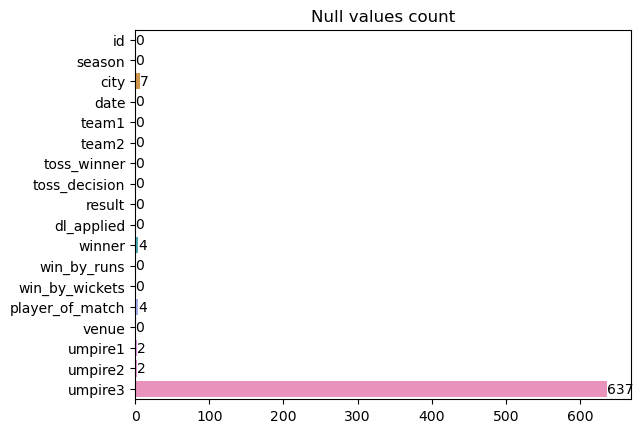

In [197]:
# Checking for null values
missing_count=df.isna().sum()
y=missing_count.index
val=missing_count.values
# plt.figure(figsize=(15,8))
ax=sns.barplot(x=val, y=y, orient='h')
ax.bar_label(ax.containers[0])
plt.title("Null values count")
plt.show()

In [198]:
# drop the umpire3 column as most of the rows are null 
df.drop("umpire3", axis="columns" , inplace=True)

In [199]:
df.dropna(inplace=True)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               743 non-null    int64 
 1   season           743 non-null    int64 
 2   city             743 non-null    object
 3   date             743 non-null    object
 4   team1            743 non-null    object
 5   team2            743 non-null    object
 6   toss_winner      743 non-null    object
 7   toss_decision    743 non-null    object
 8   result           743 non-null    object
 9   dl_applied       743 non-null    int64 
 10  winner           743 non-null    object
 11  win_by_runs      743 non-null    int64 
 12  win_by_wickets   743 non-null    int64 
 13  player_of_match  743 non-null    object
 14  venue            743 non-null    object
 15  umpire1          743 non-null    object
 16  umpire2          743 non-null    object
dtypes: int64(5), object(12)
memory usag

In [201]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,743.000000,743.000000,743.000000,743.000000,743.000000
mean,1786.578735,2013.418573,0.025572,13.460296,3.375505
std,3455.045846,3.378787,0.157961,23.626205,3.393397
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,187.500000,2011.000000,0.000000,0.000000,0.000000
50%,374.000000,2013.000000,0.000000,0.000000,4.000000
75%,567.500000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [202]:
df.duplicated()
# no duplicates are found

0      False
1      False
2      False
3      False
5      False
       ...  
750    False
751    False
752    False
754    False
755    False
Length: 743, dtype: bool

# Visualisation

In [203]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [204]:
match_count=df.groupby('season').size()
match_count

season
2008    58
2009    57
2010    60
2011    72
2012    74
2013    76
2014    53
2015    57
2016    60
2017    58
2018    60
2019    58
dtype: int64

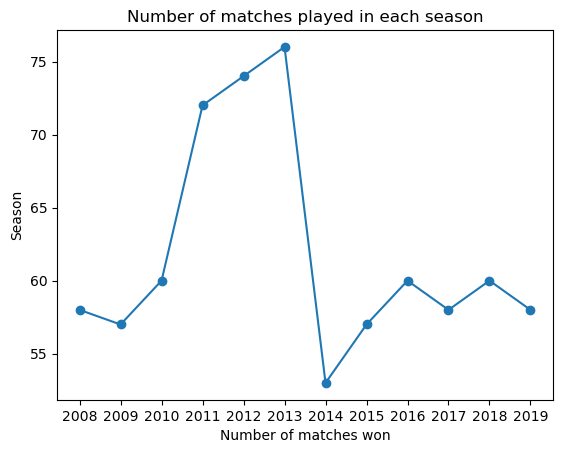

In [205]:
x=match_count.index
y=match_count.values
plt.plot(x, y, marker='o')
plt.xticks(x)
plt.xlabel("Number of matches won")
plt.ylabel("Season")
plt.title("Number of matches played in each season")
plt.show()

## Insights

1. **Increasing Trend**:
   - There is a noticeable increasing trend in the number of matches played from 2008 to 2013, peaking in 2013. The number of matches played increased from about 56 matches in 2008 to around 76 matches in 2013.

2. **Sudden Drop**:
   - There is a sharp decline in the number of matches played in 2014, dropping to about 59 matches. This significant decrease could be due to changes in the tournament format, scheduling conflicts, or other external factors affecting the league.

3. **Fluctuations Post-2014**:
   - After 2014, the number of matches played each season shows fluctuations. The number of matches remained relatively stable between 2015 and 2019, ranging between 60 and 65 matches.

## Interpretation

- The increase in the number of matches up to 2013 suggests a growing popularity and expansion of the tournament during these years.
- The sharp decline in 2014 indicates a major change or disruption in the tournament structure or scheduling.
- The fluctuations and relative stabilization post-2014 suggest adjustments were made to the tournament format, possibly balancing the league's logistics and viewer engagement.

This line chart provides a clear visual representation of how the number of matches played in each season has changed over the years, offering insights into the league's evolution and adjustments.


In [206]:
matches_won_by_team = df['winner'].value_counts()
matches_won_by_team

MI      109
CSK      98
KKR      92
RCB      82
KXIP     81
RR       75
DD       66
SRH      56
DC       29
GL       13
PW       12
RPS      10
DCap      9
KTK       6
RPSG      5
Name: winner, dtype: int64

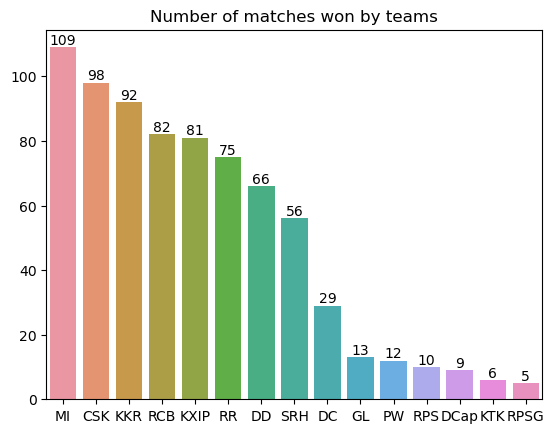

In [248]:
teams=matches_won_by_team.index.values
y=matches_won_by_team.values
ax=sns.barplot(x=teams, y=y)
ax.bar_label(ax.containers[0])
plt.title("Number of matches won by teams")
plt.show()

## Insights

1. **Top Performing Teams**:
   - **MI (Mumbai Indians)** leads with 109 wins, making them the most successful team in terms of matches won.
   - **CSK (Chennai Super Kings)** follows closely with 98 wins.
   - **KKR (Kolkata Knight Riders)** and **RCB (Royal Challengers Bangalore)** have 92 and 82 wins respectively, showing strong performances.

2. **Mid-tier Teams**:
   - Teams like **KXIP (Kings XI Punjab)**, **RR (Rajasthan Royals)**, and **DD (Delhi Daredevils)** have a moderate number of wins, with KXIP at 81 wins, RR at 75 wins, and DD at 66 wins.

3. **Lower Performing Teams**:
   - **SRH (Sunrisers Hyderabad)** and **DC (Delhi Capitals)** have 56 and 29 wins respectively.
   - **GL (Gujarat Lions)**, **PW (Pune Warriors)**, and **RPS (Rising Pune Supergiant)** have fewer wins, with GL at 13, PW at 12, and RPS at 10 wins.

4. **Least Wins**:
   - **DCap (Delhi Capitals)**, **KTK (Kochi Tuskers Kerala)**, and **RPSG (Rising Pune Supergiant)** are at the bottom with 9, 6, and 5 wins respectively.

## Interpretation

- **Mumbai Indians (MI)** and **Chennai Super Kings (CSK)** have been the most dominant teams in the league, showcasing consistent performance over the seasons.
- **Kolkata Knight Riders (KKR)** and **Royal Challengers Bangalore (RCB)** also have strong win records, indicating their competitive presence in the tournament.
- The lower number of wins for teams like **Deccan Chargers (DCap)**, **Kochi Tuskers Kerala (KTK)**, and **Rising Pune Supergiant (RPSG)** might be due to fewer seasons played or lower overall performance.

This bar chart provides a clear visual representation of the number of matches won by each team, highlighting the most and least successful teams in the tournament's history.


In [250]:
# Load the data into a DataFrame (assuming the data is in a CSV file named 'matches.csv')
team1_matches = df['team1'].value_counts()

# Count the number of matches played by each team as team2
team2_matches = df['team2'].value_counts()

# Combine the counts to get the total number of matches played by each team
total_matches = team1_matches.add(team2_matches, fill_value=0).astype(int)
perct_win=matches_won_by_team*100/total_matches
perct_win

CSK     60.493827
DC      38.666667
DCap    60.000000
DD      42.307692
GL      43.333333
KKR     51.977401
KTK     42.857143
KXIP    46.285714
MI      59.239130
PW      26.666667
RCB     47.126437
RPS     62.500000
RPSG    35.714286
RR      52.083333
SRH     53.333333
dtype: float64

# IPL Matches: Normal vs Tied

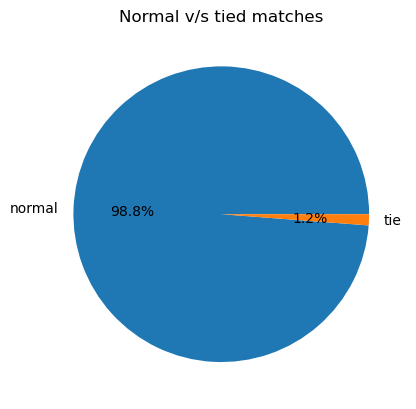

In [249]:
result_type=df['result'].unique()
y=df['result'].value_counts().values
# plt.figure(figsize=(8,6))
plt.pie(y, labels=result_type, autopct='%1.1f%%')
plt.title("Normal v/s tied matches")
plt.show()

## Analysis of IPL Matches: Normal vs Tied

## Distribution of Matches
- **Normal Matches:** 98.8%
- **Tied Matches:** 1.2%

## Patterns and Interpretation
1. **Normal Matches:** 
   - Represent a significant majority at 98.8%.
2. **Tied Matches:** 
   - Represent a small minority at 1.2%.

## Implications
- The overwhelming majority of IPL matches result in a clear outcome (a win for one team), as indicated by the 98.8% for normal matches.
- Tied matches are rare, occurring only 1.2% of the time. This suggests that most IPL matches are decided within the regular match constraints and are rarely so evenly matched that they result in a tie.
## Conclusion
The pie chart effectively highlights the rarity of tied matches in the IPL, reinforcing the dominance of normal match results in the league's history.


# Analysis of Matches Won by Batting First vs. Batting Second in IPL


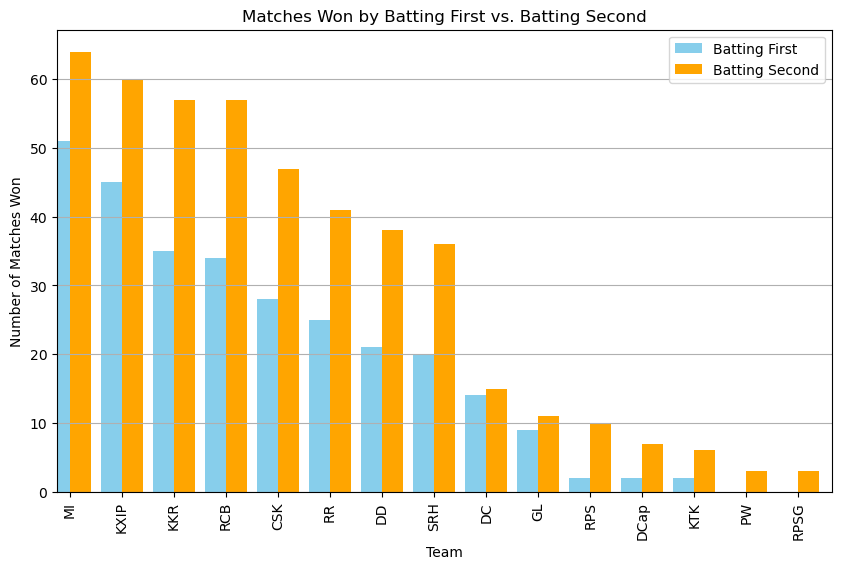

In [239]:
batting_first_wins = df[df['toss_decision'] == 'bat']['winner'].value_counts()

# Count the number of matches won by teams batting second
batting_second_wins = df[df['toss_decision'] == 'field']['winner'].value_counts()

# Plot the counts of matches won by teams batting first and second
plt.figure(figsize=(10, 6))
batting_first_wins.plot(kind='bar', color='skyblue', width=0.4, position=1, label='Batting First')
batting_second_wins.plot(kind='bar', color='orange', width=0.4, position=0, label='Batting Second')
plt.title('Matches Won by Batting First vs. Batting Second')
plt.xlabel('Team')
plt.ylabel('Number of Matches Won')
plt.legend()
# plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

## Analysis of Matches Won by Batting First vs. Batting Second in IPL

## Overview
The bar chart compares the number of matches won by different IPL teams when batting first (blue bars) versus batting second (orange bars). 

## Observations by Team

1. **MI (Mumbai Indians)**
   - **Batting First:** 45 wins
   - **Batting Second:** 64 wins
   - **Pattern:** MI has won more matches when batting second.

2. **KXIP (Kings XI Punjab)**
   - **Batting First:** 21 wins
   - **Batting Second:** 60 wins
   - **Pattern:** KXIP has a significantly higher number of wins when batting second.

3. **KKR (Kolkata Knight Riders)**
   - **Batting First:** 35 wins
   - **Batting Second:** 57 wins
   - **Pattern:** KKR also performs better when batting second.

4. **RCB (Royal Challengers Bangalore)**
   - **Batting First:** 25 wins
   - **Batting Second:** 57 wins
   - **Pattern:** More successful when chasing.

5. **CSK (Chennai Super Kings)**
   - **Batting First:** 51 wins
   - **Batting Second:** 47 wins
   - **Pattern:** CSK has a fairly balanced performance but slightly more wins when batting first.

6. **RR (Rajasthan Royals)**
   - **Batting First:** 34 wins
   - **Batting Second:** 41 wins
   - **Pattern:** Slightly more wins when batting second.

7. **DD (Delhi Daredevils)**
   - **Batting First:** 28 wins
   - **Batting Second:** 38 wins
   - **Pattern:** Better performance when batting second.

8. **SRH (Sunrisers Hyderabad)**
   - **Batting First:** 20 wins
   - **Batting Second:** 36 wins
   - **Pattern:** Significantly more wins when chasing.

9. **DC (Deccan Chargers)**
   - **Batting First:** 14 wins
   - **Batting Second:** 15 wins
   - **Pattern:** Almost equal performance in both scenarios, slightly better when chasing.

10. **GL (Gujarat Lions)**
    - **Batting First:** 2 wins
    - **Batting Second:** 11 wins
    - **Pattern:** More successful when chasing.

11. **RPS (Rising Pune Supergiant)**
    - **Batting First:** Data not available
    - **Batting Second:** 10 wins
    - **Pattern:** Only available data shows wins when batting second.

12. **DCap (Delhi Capitals)**
    - **Batting First:** 2 wins
    - **Batting Second:** 7 wins
    - **Pattern:** Better when batting second.

13. **KTK (Kochi Tuskers Kerala)**
    - **Batting First:** Data not available
    - **Batting Second:** 6 wins
    - **Pattern:** Wins only when batting second.

14. **PW (Pune Warriors)**
    - **Batting First:** 9 wins
    - **Batting Second:** 3 wins
    - **Pattern:** More wins when batting first.

15. **RPSG (Rising Pune Supergiants)**
    - **Batting First:** 2 wins
    - **Batting Second:** 3 wins
    - **Pattern:** Slightly better when chasing.

## Overall Pattern
- Most teams have a higher number of wins when batting second. This trend suggests that teams might be more successful chasing a target rather than setting one.
- Exceptions include Chennai Super Kings (CSK) and Pune Warriors (PW), which have shown better or balanced performance when batting first.

## Conclusion
The chart highlights a general preference and higher success rate for teams batting second in the IPL. This could be due to various factors, such as pitch conditions, pressure handling, and strategic advantages gained from knowing the target score.


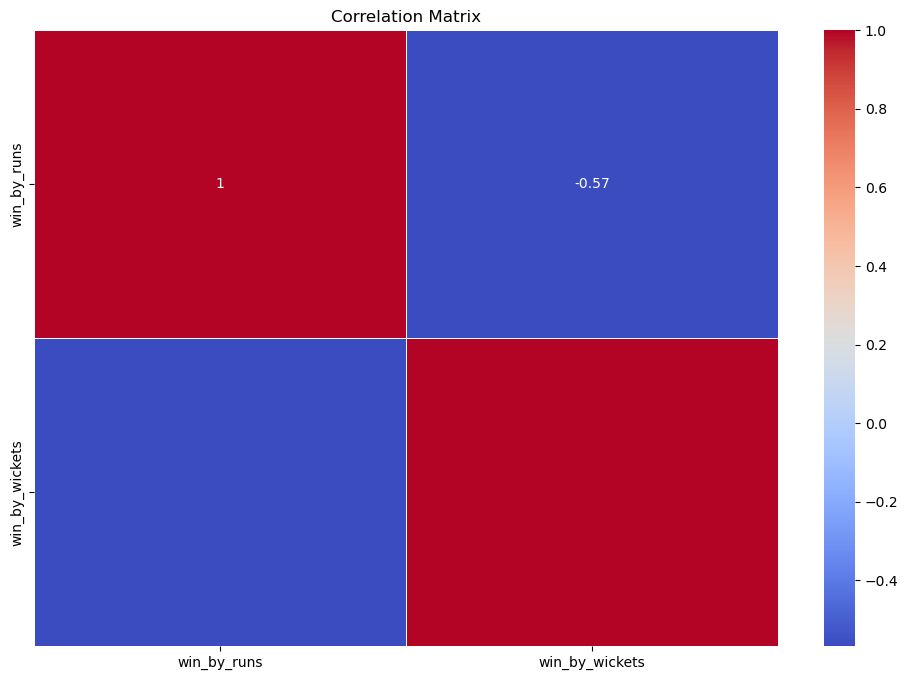

In [240]:
# 5. Heatmap - Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df[['win_by_runs', 'win_by_wickets']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Insights

1. **Negative Correlation**:
   - The correlation coefficient between "win by runs" and "win by wickets" is -0.57. This indicates a moderate negative correlation between the two variables. It means that as the margin of winning by runs increases, the margin of winning by wickets tends to decrease, and vice versa.

2. **Perfect Self-Correlation**:
   - The diagonal elements of the matrix show a perfect correlation of 1.0, which is expected because any variable is perfectly correlated with itself.

## Interpretation

- In the context of cricket matches, this negative correlation suggests that if a team wins by a large number of runs, it is less likely to win by a large number of wickets in other matches. These two modes of winning (by runs vs. by wickets) tend to inversely relate to each other, which makes intuitive sense as the strategies and conditions favoring one type of victory often oppose the other.

This heatmap provides a quick visual summary of the relationship between the two variables, aiding in understanding how they interact.
